In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int

In [4]:
def adder(state:AgentState)-> AgentState:
    """This is addition node"""
    
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def substractor(state:AgentState)-> AgentState:
    """This is subtraction node"""
    
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState)-> AgentState:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "addition_operation"
    
    if state['operation'] == "-":
        return "subtraction_operation"

In [13]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state) # passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
                            "router",
                            decide_next_node,
                            {
                                # Edge: Node
                                "addition_operation" : "add_node",
                                "subtraction_operation" : "substract_node"
                            }
)

""" 
Note:  Remove this sentence while running
This is the conditional routing block. How it works:

When the execution reaches the "router" node, langgraph will call the supplied decide_next_node function (passing the current state).

decide_next_node returns a label (string) — e.g. "addition_operation" or "subtraction_operation".

add_conditional_edges uses the mapping dict to map that label → a target node name. For example "addition_operation": "add_node" tells the graph that returning "addition_operation" should route to the node named "add_node".

Execution then continues at that target node.

Important: the keys of the mapping must exactly match the strings returned by decide_next_node. The mapping values are the node names you registered with add_node."""

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()                      

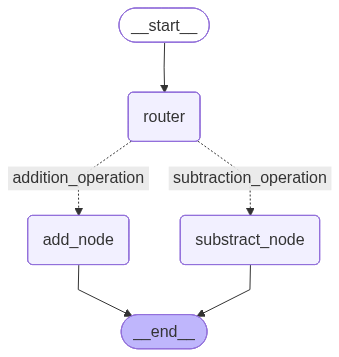

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
intial_state = AgentState(number1=10, operation="+", number2=4)
print(app.invoke(intial_state))

{'number1': 10, 'operation': '+', 'number2': 4, 'finalNumber': 14}
